# 0.1 Importing libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 0.2 Importing data files

In [2]:
#Setting path
path = r'C:\Users\skhra\DataAnalytics\Feb2025_InstacartBasketAnalysis'

In [3]:
#Importing grand_merged dataset 
df_grand_merge = pd.read_pickle(os.path.join(path, '02- Data', 'PreparedData', 'grand_merge.pkl'))

In [4]:
#Checking dataset
df_grand_merge.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_from_previous_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df_grand_merge.shape

(32404859, 33)

In [6]:
#Removing a column not needed any more
df_grand_merge = df_grand_merge.drop(columns = ['_merge'])

In [7]:
df_grand_merge.shape

(32404859, 32)

In [8]:
df_grand_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_from_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyality_flag',
       'avg_order', 'spending_flag', 'median_days_from_previous_order',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

# 0.3 Additional analytics

## 0.3.1. Regional information

In [9]:
#Creating region lists:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

## Adding new column using loc() function

In [10]:
df_grand_merge.loc[df_grand_merge['state'].isin(Northeast), 'region'] = 'Northeast'

In [11]:
df_grand_merge.loc[df_grand_merge['state'].isin(Midwest), 'region'] = 'Midwest'

In [12]:
df_grand_merge.loc[df_grand_merge['state'].isin(South), 'region'] = 'South'

In [13]:
df_grand_merge.loc[df_grand_merge['state'].isin(West), 'region'] = 'West'

In [14]:
# Checking the dataset
df_grand_merge.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_from_previous_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [15]:
df_grand_merge['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [50]:
#Creating crosstabs
crosstab = pd.crosstab(df_grand_merge['region'], df_grand_merge['spending_flag'], dropna = False)

In [56]:
#crosstab of spending flag and loyality status
crosstab = pd.crosstab(df_grand_merge['loyality_flag'], df_grand_merge['spending_flag'], dropna = False)

In [73]:
#crosstab of spending flag and family status
crosstab = pd.crosstab(df_grand_merge['fam_status'], df_grand_merge['spending_flag'], dropna = False)

In [74]:
crosstab.to_clipboard()

## 0.3.2 Removing low-activity customers

In [18]:
#Removing low-activity customers
df_grand_merge_high_activity = df_grand_merge[df_grand_merge['max_order']>=5]

In [19]:
low_activity = df_grand_merge[df_grand_merge['max_order']<5]

In [20]:
len(low_activity)

1440295

In [21]:
#Checking the dataset
df_grand_merge_high_activity[['user_id', 'max_order']].drop_duplicates()

,user_id,max_order
0,1,10
59,2,14
254,3,12
342,4,5
411,7,20
...,...,...
32403340,206203,5
32403545,206206,67
32403830,206207,16
32404053,206208,49


In [22]:
len(low_activity) + len(df_grand_merge_high_activity)

32404859

In [23]:
#Exporting the dataset
df_grand_merge_high_activity.to_pickle(os.path.join(path, '02- Data', 'PreparedData', 'grand_merge_high_activity.pkl'))

## 0.3.3. Creating family profile

In [24]:
df_grand_merge.loc[(df_grand_merge['fam_status'] == 'married') & (df_grand_merge['n_dependants']>1), 'family_profile'] = 'Married with children'

In [25]:
df_grand_merge.loc[(df_grand_merge['fam_status'] == 'married') & (df_grand_merge['n_dependants']<=1), 'family_profile'] = 'Married without children'

In [26]:
df_grand_merge.loc[(df_grand_merge['fam_status'] != 'married') & (df_grand_merge['n_dependants']>=1), 'family_profile'] = 'Single with children'

In [27]:
df_grand_merge.loc[(df_grand_merge['fam_status'] != 'married') & (df_grand_merge['n_dependants']<1), 'family_profile'] = 'Single without children'

In [28]:
#Checking dataset
df_grand_merge.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_from_previous_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,region,family_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Married with children
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Married with children
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Married with children
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Married with children
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Married with children


In [29]:
df_grand_merge[['fam_status', 'n_dependants']].drop_duplicates()

,fam_status,n_dependants
0,married,3
360,divorced/widowed,0
397,married,1
411,married,2
979,single,0
7162,living with parents and siblings,3
10090,living with parents and siblings,2
16807,living with parents and siblings,1


In [30]:
df_grand_merge['family_profile'].value_counts(dropna = False)

family_profile
Married with children       15205849
Single without children      8097503
Married without children     7550904
Single with children         1550603
Name: count, dtype: int64

In [31]:
# Aggregating family profile data
df_grand_merge.groupby('family_profile').agg({'prices':['mean', 'min', 'max'], 'order_number':['mean', 'min', 'max']})

prices               order_number        
                               mean  min      max         mean min max
family_profile                                                        
Married with children     12.154546  1.0  99999.0    17.106120   1  99
Married without children  11.705834  1.0  99999.0    17.052363   1  99
Single with children      10.828768  1.0  99999.0    17.296372   1  99
Single without children   12.129243  1.0  99999.0    17.264622   1  99

## 0.3.4 Spend vs HOD

In [34]:
sumprices_ohd = df_grand_merge.groupby('order_hour_of_day').agg({'prices': ['sum']})

In [37]:
sumprices_ohd


,prices
,sum
order_hour_of_day,
0,2281125.1
1,1156287.5
2,1019750.3
3,680130.1
4,651364.0
5,1111937.9
6,3421974.7
7,10961331.9


In [33]:
df_grand_merge.groupby('order_hour_of_day').agg({'prices': ['mean']})

,prices
,mean
order_hour_of_day,
0,10.427095
1,9.993842
2,14.699103
3,13.262809
4,12.234026
5,12.641260
6,11.779887
7,12.301535


# 0.4 Visualizations

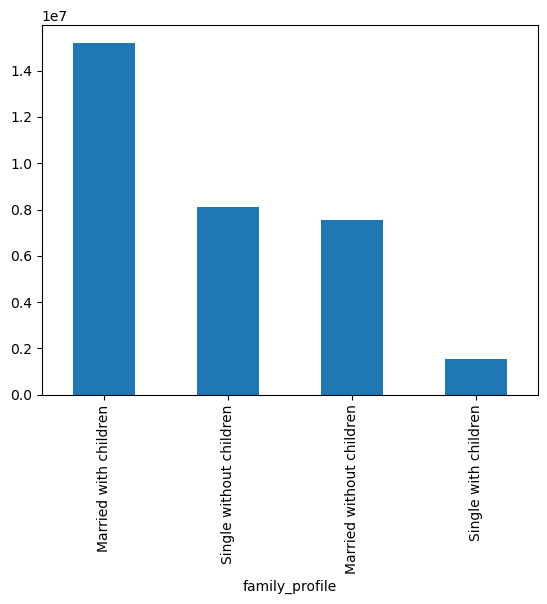

In [38]:
#Creating a bar chart of family profiles
Bar1 = df_grand_merge['family_profile'].value_counts().plot.bar()

In [39]:
#Exporting this visualization
Bar1.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'Bar1.png'), dpi = 300, bbox_inches = 'tight')

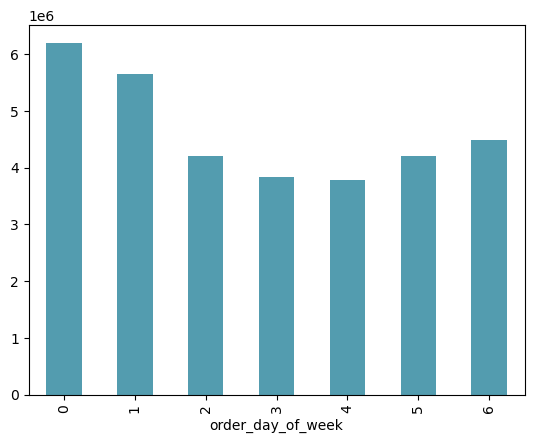

In [40]:
#Creating a bar chart
orders_dow=df_grand_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = '#539caf')

In [41]:
#Exporting this visualization
orders_dow.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'orders_dow.png'), dpi = 300, bbox_inches = 'tight')

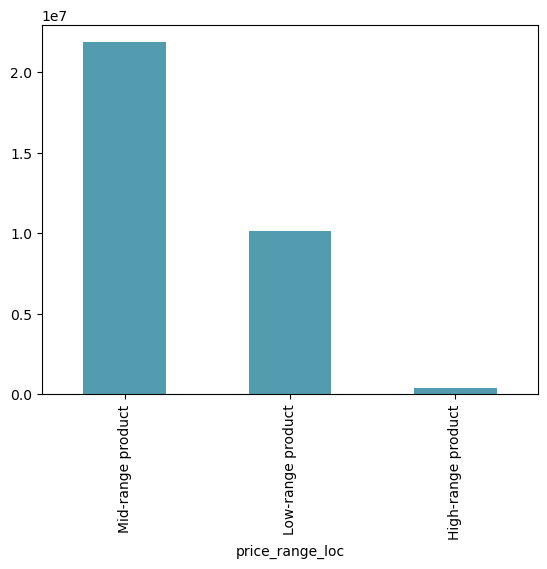

In [42]:
#Creating a bar chart of price range
price_ranges = df_grand_merge['price_range_loc'].value_counts().plot.bar(color = '#539caf')

In [48]:
#Exporting this visualization
price_ranges.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'price_ranges.png'), dpi = 300, bbox_inches = 'tight')

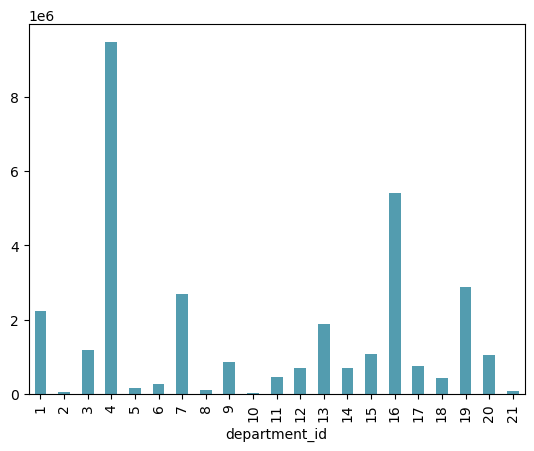

In [45]:
#Creating a bar chart of department_id
department_frequency = df_grand_merge['department_id'].value_counts().sort_index().plot.bar(color = '#539caf')

In [47]:
#Exporting this visualization
department_frequency.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'department_frequency.png'), dpi = 300, bbox_inches = 'tight')

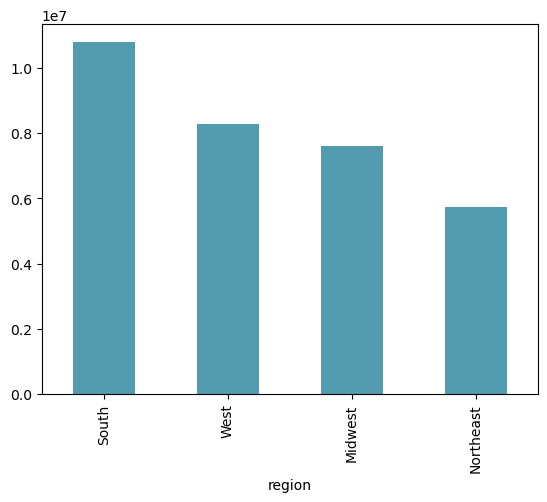

In [52]:
#Creating a bar chart of regions
region_frequency = df_grand_merge['region'].value_counts().plot.bar(color = '#539caf')

In [59]:
#Exporting this visualization
region_frequency.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'region_frequency.png'), dpi = 300, bbox_inches = 'tight')

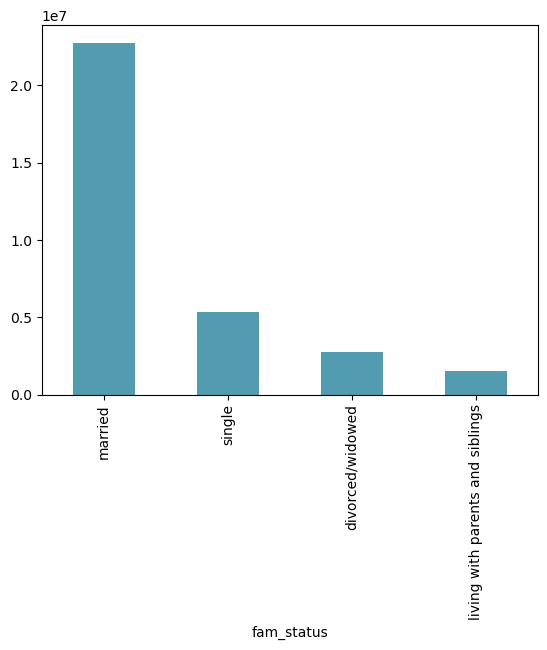

In [60]:
#Creating a bar chart of family status
fam_status_frequency = df_grand_merge['fam_status'].value_counts().plot.bar(color = '#539caf')

In [61]:
#Exporting this visualization
fam_status_frequency.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'fam_status_frequency.png'), dpi = 300, bbox_inches = 'tight')

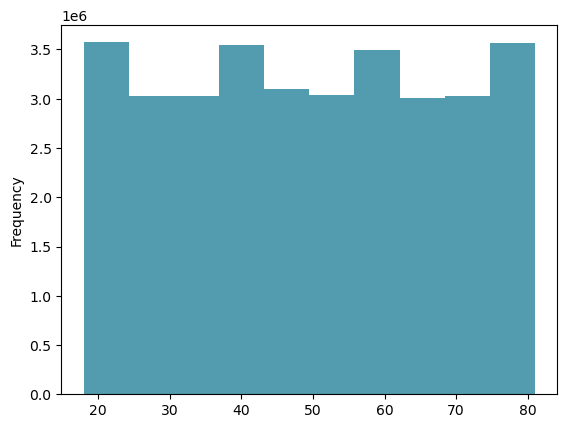

In [70]:
# Histogram of order_hour_of_day 
age_hist=df_grand_merge['age'].plot.hist(bins=10, color = '#539caf')


In [72]:
#Exporting this visualization
age_hist.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'age_frequency.png'), dpi = 300, bbox_inches = 'tight')

<Axes: xlabel='order_hour_of_day'>

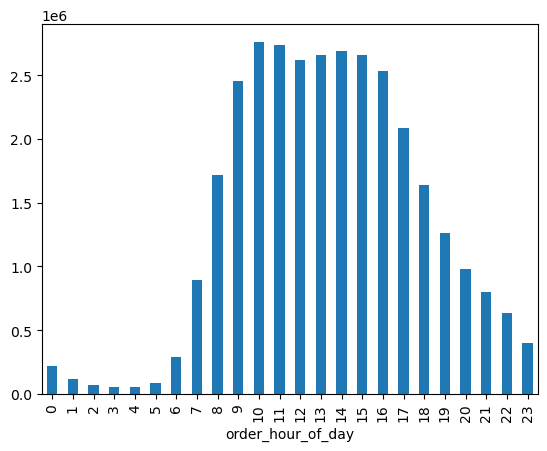

In [122]:
# Creating another bar chart
df_grand_merge['order_hour_of_day'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

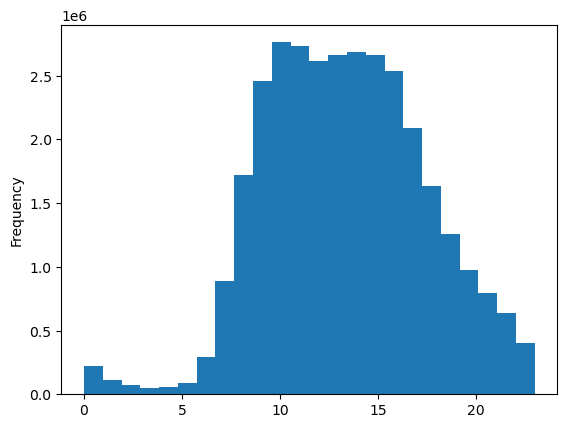

In [123]:
# Histogram of order_hour_of_day 
df_grand_merge['order_hour_of_day'].plot.hist(bins=24)

In [125]:
#Another way to produce hystogram
def histogram(data, n_bins, cumulative=False, x_label = " ", y_label = " ", title = " "):
    _, ax = plt.subplots()
    ax.hist(data, bins = n_bins, cumulative = cumulative, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

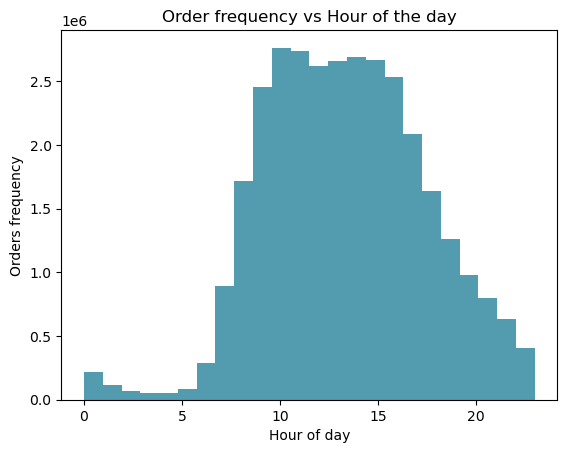

In [126]:
data = df_grand_merge['order_hour_of_day']
histogram(data, n_bins = 24, cumulative = False, x_label = 'Hour of day', y_label = 'Orders frequency', title = 'Order frequency vs Hour of the day')

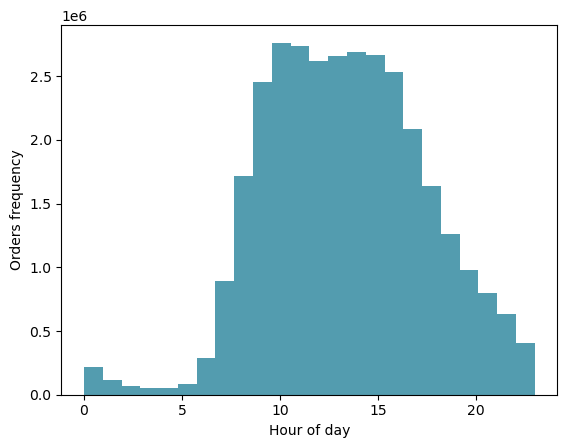

In [127]:
#Exporting this nice histogram
plt.hist(data, bins = 24, color = '#539caf')
plt.xlabel('Hour of day')
plt.ylabel('Orders frequency')
plt.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'Orders_hod.png'), dpi = 300, bbox_inches = 'tight')

In [58]:
plt.close()

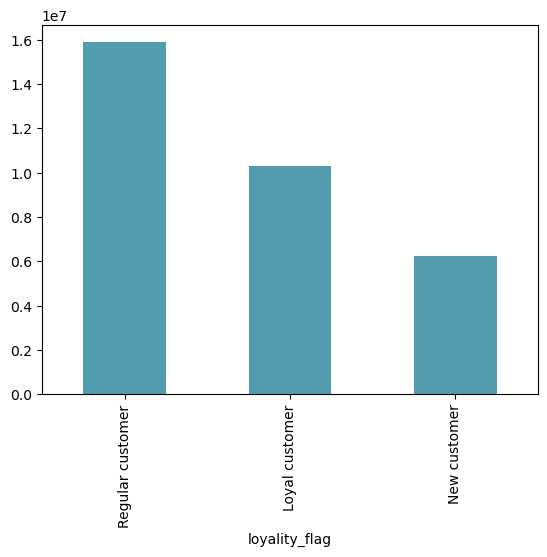

In [65]:
# Visualizing loyality flag
bar_loyality = df_grand_merge['loyality_flag'].value_counts().plot.bar(color = '#539caf')

In [66]:
#Exporting this visualization
bar_loyality.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'Bar_loyality.png'), dpi = 300, bbox_inches = 'tight')

# 0.5 Sampling data

## 0.5.1 Price vs Hour of day

In [128]:
#Creating a sample (20 and 80)
np.random.seed(4)
dev = np.random.rand(len(df_grand_merge))<=0.8

In [129]:
# Store 80% of the sample in the dataframe big
big = df_grand_merge[dev]

In [130]:
#Store 20% of the sample in the dataframe small
small = df_grand_merge[~dev]

In [131]:
#Consistency check
len(df_grand_merge)

32404859

In [132]:
len(big)+len(small)

32404859

In [133]:
#Further specifying the necessary data 
df_1 = small[['order_hour_of_day', 'prices']]

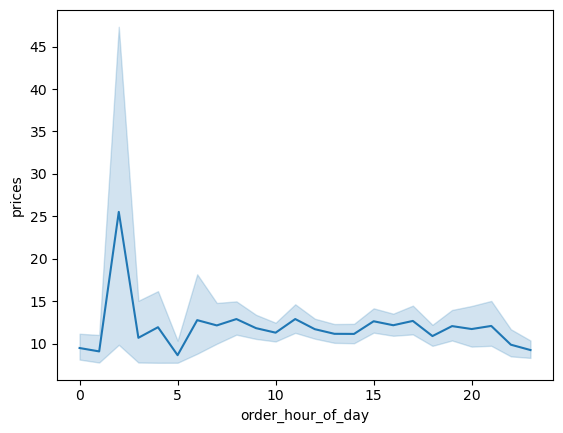

In [134]:
# Now lineplot can be created
line1 = sns.lineplot(data = df_1, x = 'order_hour_of_day', y = 'prices')

In [88]:
#Exporting this visualization
line1.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'line1.png'), dpi = 300, bbox_inches = 'tight')

## 0.5.2 Dependants vs Age

In [135]:
#Defining the minimum dataset
df_2 = small[['age', 'n_dependants']]

In [136]:
df_2.head(100)


,age,n_dependants
0,31,3
2,31,3
6,31,3
12,31,3
13,31,3
...,...,...
454,39,2
456,39,2
461,39,2
466,39,2


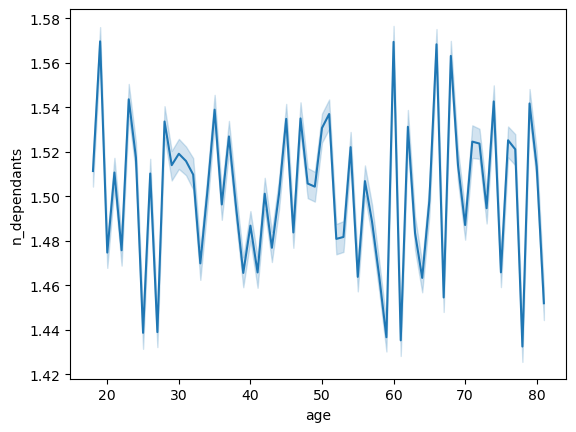

In [137]:
# Creating lineplot 
line2 = sns.lineplot(data = df_2, x = 'age', y = 'n_dependants')

In [96]:
#Exporting this visualiszation
line2.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'line2.png'), dpi = 300, bbox_inches = 'tight')

## No clear correlation bewteen aga and the number of dependants is observed.

## 0.5.3. Income vs Age

In [138]:
# Defining minimum dataset
df_3 = small[['age', 'income']]

In [139]:
df_3.head(5)

,age,income
0,31,40423
2,31,40423
6,31,40423
12,31,40423
13,31,40423


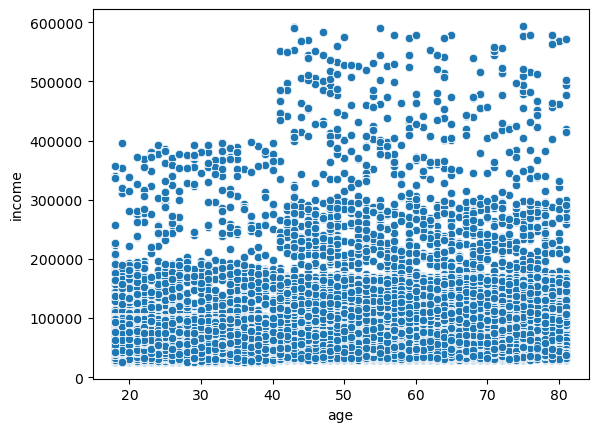

In [140]:
#Creating scatterplot
scatter1 = sns.scatterplot(x= 'age', y= 'income', data = df_3)

In [100]:
#Exporting this visualiszation
scatter1.figure.savefig(os.path.join(path, '04-Analytics', 'Visualizations', 'scatter1.png'), dpi = 300, bbox_inches = 'tight')

## There is a visible increase in income with age. In particular, it is clearly seen that the number of people with income >~ 200000 increases considerably at age >~ 40